In [1]:
# Dataset

#https://data.mendeley.com/datasets/5fk732vkwr/2

# https://link.springer.com/content/pdf/10.1007/s00766-016-0251-9.pdf

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

from sklearn.tree import DecisionTreeClassifier, export_text

In [3]:
#Read the dataset 
filepath = 'Dataset/Pan_Dataset.xlsx'
df = pd.read_excel(filepath)

In [4]:
df.shape

(1390, 3)

In [5]:
# four different features i.e label dataset

unique = df['class'].unique()
unique

array(['feature request', 'information giving', 'problem discovery',
       'information seeking'], dtype=object)

In [6]:
df.head(10)

id                                             review               class
0  39  Make it like better with a giant pig bigger th...     feature request
1  42  These screens are small enough without crowdin...  information giving
2  49  Dear Rovio; If you absolutely must continue tr...  information giving
3  56      App crashes when new power up notice pops up.   problem discovery
4  62  It would be nice to have an update that didn  ...  information giving
5  63                      App crashes with new release.   problem discovery
6  67  I have had no problems with any of the version...  information giving
7  68  Please bring back the trajectory line or at le...     feature request
8  69  This is not worth buying it will crash right f...   problem discovery
9  70  I will say you should make shock so close to t...     feature request

In [7]:
# top level overview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1390 entries, 0 to 1389
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      1390 non-null   int64 
 1   review  1390 non-null   object
 2   class   1390 non-null   object
dtypes: int64(1), object(2)
memory usage: 32.7+ KB


In [8]:
df.head()

id                                             review               class
0  39  Make it like better with a giant pig bigger th...     feature request
1  42  These screens are small enough without crowdin...  information giving
2  49  Dear Rovio; If you absolutely must continue tr...  information giving
3  56      App crashes when new power up notice pops up.   problem discovery
4  62  It would be nice to have an update that didn  ...  information giving

In [9]:
df.describe()

id
count    1390.000000
mean    20152.887050
std     29094.672527
min         8.000000
25%     13226.250000
50%     15564.000000
75%     17479.000000
max    144214.000000

<AxesSubplot:>

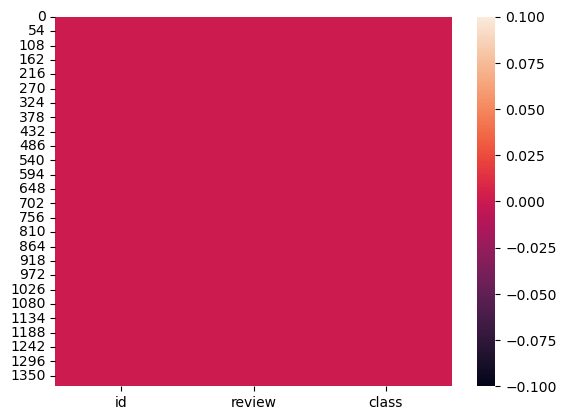

In [10]:
sns.heatmap(df.isnull())

# Text preprocessing: StopWord Removal, steaming and lemmanization

In [11]:
#per process the data using python and nltk librrary
# Download NLTK resources (if not already downloaded)
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Tokenization
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords
    stopwords_list = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stopwords_list]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back into text
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

# Assuming your DataFrame is named df and the column containing the review text is named 'review'
df['preprocessed_review'] = df['review'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /home/simon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/simon/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /home/simon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
df.head(10)

id                                             review               class  \
0  39  Make it like better with a giant pig bigger th...     feature request   
1  42  These screens are small enough without crowdin...  information giving   
2  49  Dear Rovio; If you absolutely must continue tr...  information giving   
3  56      App crashes when new power up notice pops up.   problem discovery   
4  62  It would be nice to have an update that didn  ...  information giving   
5  63                      App crashes with new release.   problem discovery   
6  67  I have had no problems with any of the version...  information giving   
7  68  Please bring back the trajectory line or at le...     feature request   
8  69  This is not worth buying it will crash right f...   problem discovery   
9  70  I will say you should make shock so close to t...     feature request   

                                 preprocessed_review  
0         make like better giant pig bigger king pig  
1  screen small enough without crowding stuff tuc...  
2  dear rovio absolutely must continue trying squ...  
3                     app crash new power notice pop  
4                        would nice update crash app  
5                              app crash new release  
6                                problem version far  
7  please bring back trajectory line least make turn  
8                 worth buying crash right beginning  
9  say make shock close button like use bird provide

In [13]:
# Text preporsiing 
# StopWord Removal, steeming and lemmanization
# ACtive learning : pool based sampling

# https://www.rit.edu/academicaffairs/facultyscholarship/submit/download_file.php?id=66586

# keyword related features: String Matching and Bag of words

'''
Used TF-IDf that access the importance of word in review message
past tense: might revel bug report or  user experience

future tense: hypothetical scenaior, enhancement or feature request
model verbs(can, could, might, shall, should, will, must, would) might revel feature request
lengthy review- might contain bug report or ux description
Sentiment analysis  based features: negative sentiment=> bug reports | postive sentime => user experience


Mutilabel Active learning
============================
Libact python package= > AL algo
Multilabel Active Learing(Auxiliary learner) is most popular


'''



'\nUsed TF-IDf that access the importance of word in review message\npast tense: might revel bug report or  user experience\n\nfuture tense: hypothetical scenaior, enhancement or feature request\nmodel verbs(can, could, might, shall, should, will, must, would) might revel feature request\nlengthy review- might contain bug report or ux description\nSentiment analysis  based features: negative sentiment=> bug reports | postive sentime => user experience\n\n\nMutilabel Active learning\n============================\nLibact python package= > AL algo\nMultilabel Active Learing(Auxiliary learner) is most popular\n\n\n'

# Train different supervised learning model. included logistic regression, Naive Bayes, Decision Tree and evaluate the performance of the model on the dataset.

In [143]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['class'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Initialize and train the classifier
classifier = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
classifier.fit(X_train_vectorized, y_train)


# Make predictions
y_pred_l = classifier.predict(X_test_vectorized)

# Evaluate the model
print(classification_report(y_test, y_pred_l))

                     precision    recall  f1-score   support

    feature request       0.74      0.31      0.44        45
 information giving       0.68      0.81      0.74       124
information seeking       1.00      0.43      0.60        21
  problem discovery       0.71      0.82      0.76        88

           accuracy                           0.71       278
          macro avg       0.78      0.59      0.63       278
       weighted avg       0.72      0.71      0.69       278



In [144]:
# Initialize and train the Naive Bayes classifier
#
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

# Make predictions
y_pred_nb = classifier.predict(X_test_vectorized)

# Evaluate the model
print(classification_report(y_test, y_pred_nb))

                     precision    recall  f1-score   support

    feature request       1.00      0.02      0.04        45
 information giving       0.60      0.83      0.70       124
information seeking       1.00      0.10      0.17        21
  problem discovery       0.71      0.83      0.76        88

           accuracy                           0.64       278
          macro avg       0.83      0.44      0.42       278
       weighted avg       0.73      0.64      0.57       278



In [145]:
# Decisiton tree
# Initialize and train the Decision Tree classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_vectorized, y_train)

# Make predictions
y_pred_d = classifier.predict(X_test_vectorized)

# Evaluate the model
print(classification_report(y_test, y_pred_d))

                     precision    recall  f1-score   support

    feature request       0.54      0.42      0.48        45
 information giving       0.70      0.69      0.70       124
information seeking       0.70      0.67      0.68        21
  problem discovery       0.67      0.76      0.71        88

           accuracy                           0.67       278
          macro avg       0.65      0.64      0.64       278
       weighted avg       0.66      0.67      0.66       278



In [146]:
# Print the decision tree
feature_names = vectorizer.get_feature_names_out().tolist()
tree_rules = export_text(classifier, feature_names=feature_names)
print(tree_rules)

|--- crashes <= 0.05
|   |--- fix <= 0.14
|   |   |--- why <= 0.14
|   |   |   |--- problem <= 0.07
|   |   |   |   |--- wish <= 0.17
|   |   |   |   |   |--- please <= 0.10
|   |   |   |   |   |   |--- but <= 0.13
|   |   |   |   |   |   |   |--- would <= 0.13
|   |   |   |   |   |   |   |   |--- happened <= 0.14
|   |   |   |   |   |   |   |   |   |--- pins <= 0.12
|   |   |   |   |   |   |   |   |   |   |--- and <= 0.14
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 56
|   |   |   |   |   |   |   |   |   |   |--- and >  0.14
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |--- pins >  0.12
|   |   |   |   |   |   |   |   |   |   |--- it <= 0.07
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- it >  0.07
|   |   |   |   |   |   |   |   |   |   |   |--- class: information giving
|   |   |   |   |   |   |   |   |--- happen

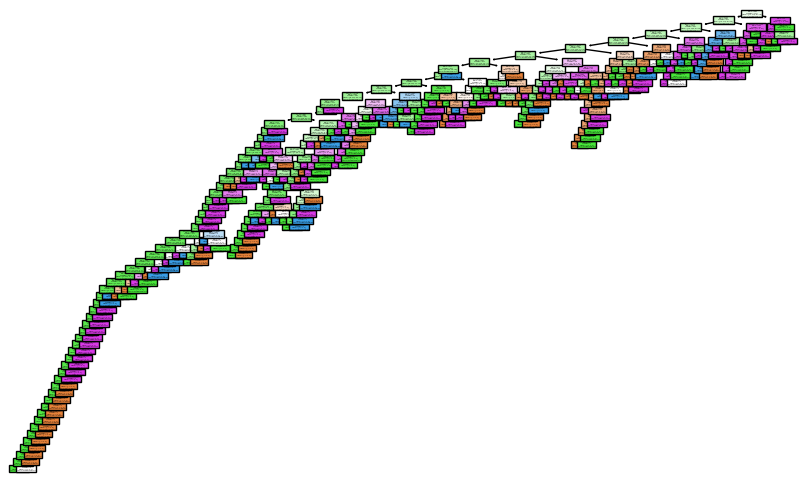

In [147]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(10, 6))
plot_tree(classifier, feature_names=vectorizer.get_feature_names_out(), class_names=classifier.classes_, filled=True)
plt.show()



In [150]:
# displaying all the model perfance in singel table and comparin for evaluation. 
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define evaluation function
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    return accuracy, precision, recall, f1

# Example models and their predictions
models = ['Logistirc Regression', 'Naive Bayes', 'Decision Tree']
y_true = y_test


y_preds = [y_pred_l, y_pred_nb, y_pred_d]  # Model C predictions

# Evaluate models
results = []
for model, y_pred in zip(models, y_preds):
    evaluation = evaluate_model(y_true, y_pred)
    results.append([model] + list(evaluation))

# Create a DataFrame to display results
df_model = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score'])
print(df_model)

                  Model  Accuracy  Precision    Recall  F1-score
0  Logistirc Regression  0.705036   0.781891  0.593095  0.634833
1           Naive Bayes  0.643885   0.826894  0.444413  0.419434
2         Decision Tree  0.669065   0.653011  0.635950  0.641762


# Bert sentiment analysis auto labeling into positive and Neagative.

In [151]:
#Read the dataset  again to implement bert sentiment
filepath = 'Dataset/Pan_Dataset.xlsx'
df = pd.read_excel(filepath)
df

id                                             review  \
0         39  Make it like better with a giant pig bigger th...   
1         42  These screens are small enough without crowdin...   
2         49  Dear Rovio; If you absolutely must continue tr...   
3         56      App crashes when new power up notice pops up.   
4         62  It would be nice to have an update that didn  ...   
...      ...                                                ...   
1385  143476                             Ma fav\tI just love it   
1386  143509    But the problem is very slow running to update.   
1387  143513  But I  d suggest two important features which ...   
1388  143513  Why this is available on iOS while it  s not o...   
1389  143513                         This must be added common.   

                    class  
0         feature request  
1      information giving  
2      information giving  
3       problem discovery  
4      information giving  
...                   ...  
1385   information giving  
1386    problem discovery  
1387      feature request  
1388  information seeking  
1389      feature request  

[1390 rows x 3 columns]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


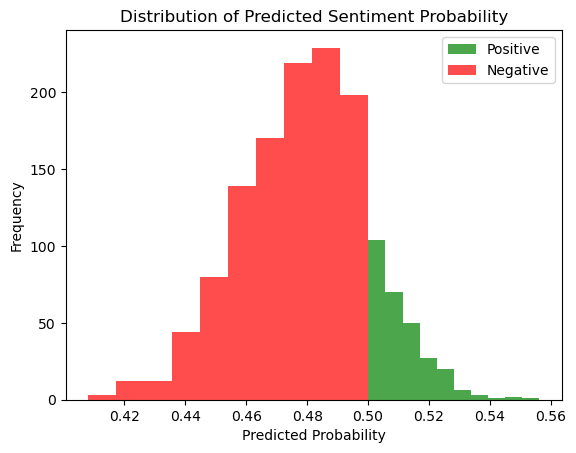

In [155]:
# BERT classfiying text as postive and Negative.
'''
Transformer-based models: BERT - pre trained on large corpora na dfine tuned 
'''

import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.nn.functional import softmax
import pandas as pd

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
model.eval()

# Define function to perform sentiment analysis
def predict_sentiment(review):
    inputs = tokenizer(review, return_tensors='pt', max_length=512, truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.softmax(logits, dim=1).tolist()[0]
    sentiment_score = probabilities[1]  # Probability of positive sentiment (index 1 for positive class)
    predicted_label = "Positive" if sentiment_score > 0.5 else "Negative"
    predicted_probability = sentiment_score
    return predicted_label, predicted_probability

# Apply sentiment analysis to each review
df['predicted_label'], df['predicted_probability'] = zip(*df['review'].apply(predict_sentiment))

# Separate positive and negative reviews
positive_reviews = df[df['predicted_label'] == 'Positive']
negative_reviews = df[df['predicted_label'] == 'Negative']

# Display distribution of sentiment scores
plt.hist(positive_reviews['predicted_probability'], color='green', alpha=0.7, label='Positive')
plt.hist(negative_reviews['predicted_probability'], color='red', alpha=0.7, label='Negative')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Sentiment Probability')
plt.legend()
plt.show()

In [161]:
df.head(10)

id                                             review               class  \
0  39  Make it like better with a giant pig bigger th...     feature request   
1  42  These screens are small enough without crowdin...  information giving   
2  49  Dear Rovio; If you absolutely must continue tr...  information giving   
3  56      App crashes when new power up notice pops up.   problem discovery   
4  62  It would be nice to have an update that didn  ...  information giving   
5  63                      App crashes with new release.   problem discovery   
6  67  I have had no problems with any of the version...  information giving   
7  68  Please bring back the trajectory line or at le...     feature request   
8  69  This is not worth buying it will crash right f...   problem discovery   
9  70  I will say you should make shock so close to t...     feature request   

  predicted_label  predicted_probability predicted_class  
0        Negative               0.497671        Negative  
1        Positive               0.522753        Negative  
2        Negative               0.488171        Negative  
3        Negative               0.451165        Negative  
4        Negative               0.475567        Negative  
5        Negative               0.429440        Negative  
6        Negative               0.467272        Negative  
7        Negative               0.476412        Negative  
8        Negative               0.486745        Negative  
9        Negative               0.487656        Negative

Text(0, 0.5, 'Count')

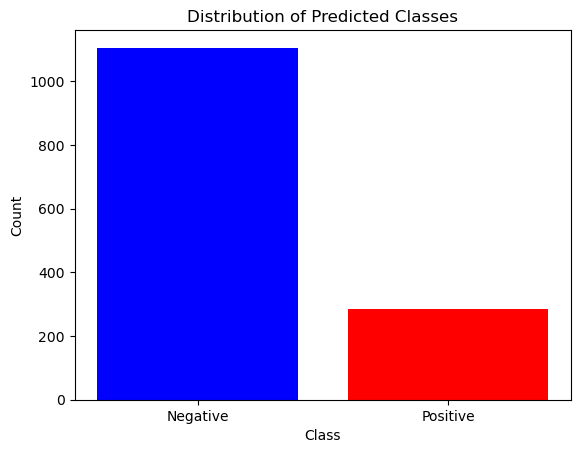

In [162]:
# Count occurrences of positive and negative classes
class_counts = df['predicted_label'].value_counts()

# Create bar chart
plt.bar(class_counts.index, class_counts.values, color=['blue', 'red'])
plt.title('Distribution of Predicted Classes')
plt.xlabel('Class')
plt.ylabel('Count')
# plt.show()

In [ ]:
# tH

## RQ1 : How does the integration of sentiment analysis impact the accuracy and effectiveness of machine learning models in categorizing user reviews into four different labels?"

- Incorporating sentiment features, ML model can better understand the underlying sentiment of user, leading to more accurate categorization.
- creates a feedback loop where the models can continously learn and improve from sentiment information.
- 

In [163]:
df.head()

id                                             review               class  \
0  39  Make it like better with a giant pig bigger th...     feature request   
1  42  These screens are small enough without crowdin...  information giving   
2  49  Dear Rovio; If you absolutely must continue tr...  information giving   
3  56      App crashes when new power up notice pops up.   problem discovery   
4  62  It would be nice to have an update that didn  ...  information giving   

  predicted_label  predicted_probability predicted_class  
0        Negative               0.497671        Negative  
1        Positive               0.522753        Negative  
2        Negative               0.488171        Negative  
3        Negative               0.451165        Negative  
4        Negative               0.475567        Negative

In [165]:
# model performance evaluation metrices.
df_model

Model  Accuracy  Precision    Recall  F1-score
0  Logistirc Regression  0.705036   0.781891  0.593095  0.634833
1           Naive Bayes  0.643885   0.826894  0.444413  0.419434
2         Decision Tree  0.669065   0.653011  0.635950  0.641762

In [173]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the dataset
data = df

# Convert text data into numerical features
vectorizer = TfidfVectorizer()
X_text = vectorizer.fit_transform(data['review'])

# Convert predicted sentiment labels into numerical features
# Assuming 1 for positive sentiment and 0 for negative sentiment
data['predicted_sentiment'] = data['predicted_label'].apply(lambda x: 1 if x == 'Positive' else 0)

# Combine text features with predicted sentiment as additional features
X = pd.concat([pd.DataFrame(X_text.toarray()), data['predicted_sentiment']], axis=1)
y = data['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train a classification model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)


# Evaluate the model
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')



Accuracy: 0.6690647482014388
Precision: 0.6647041669800049
Recall: 0.6690647482014388
F1 Score: 0.6647052007467811
Confusion Matrix:
[[19 17  0  9]
 [12 86  5 21]
 [ 0  4 14  3]
 [ 4 16  1 67]]


/home/simon/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [178]:

def evaluate_classifier(classifier, classifier_name, X_train, X_test, y_train, y_test):
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Make predictions
    y_pred = classifier.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Create a dictionary to store evaluation metrics
    evaluation_metrics = {
        'Classifier': classifier_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    }
    
    return evaluation_metrics

# Load the dataset
data = df

# Convert text data into numerical features
vectorizer = TfidfVectorizer()
X_text = vectorizer.fit_transform(data['review'])

# Convert predicted sentiment labels into numerical features
# Assuming 1 for positive sentiment and 0 for negative sentiment
data['predicted_sentiment'] = data['predicted_label'].apply(lambda x: 1 if x == 'Positive' else 0)

# Combine text features with predicted sentiment as additional features
X = pd.concat([pd.DataFrame(X_text.toarray()), data['predicted_sentiment']], axis=1)
y = data['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier()
}

# Evaluate classifiers
evaluation_metrics = []
for classifier_name, classifier in classifiers.items():
    metrics = evaluate_classifier(classifier, classifier_name, X_train, X_test, y_train, y_test)
    evaluation_metrics.append(metrics)

# Convert the list of dictionaries into a pandas DataFrame
evaluation_metrics_df = pd.DataFrame(evaluation_metrics)

# Print the DataFrame
print("==========with combining with sentiment ============")
print(evaluation_metrics_df)
print("==========without combining sentiment============")
print(df_model)

/home/simon/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/simon/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


==========with combining============
            Classifier  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.683453   0.703217  0.683453  0.656021
1          Naive Bayes  0.636691   0.563021  0.636691  0.561385
2        Decision Tree  0.636691   0.634375  0.636691  0.634722
==========without combining============
                  Model  Accuracy  Precision    Recall  F1-score
0  Logistirc Regression  0.705036   0.781891  0.593095  0.634833
1           Naive Bayes  0.643885   0.826894  0.444413  0.419434
2         Decision Tree  0.669065   0.653011  0.635950  0.641762


/home/simon/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/simon/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/simon/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/simon/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int'

## RQ2: Which unsupervised ML model perform best based on evaluation matrices. 
- Will combining with preprocessed text make any difference


In [ ]:

'''
==========without combining============
                  Model  Accuracy  Precision    Recall  F1-score
0  Logistirc Regression  0.705036   0.781891  0.593095  0.634833
1           Naive Bayes  0.643885   0.826894  0.444413  0.419434
2         Decision Tree  0.669065   0.653011  0.635950  0.641762
'''

In [14]:
df.head()

id                                             review               class  \
0  39  Make it like better with a giant pig bigger th...     feature request   
1  42  These screens are small enough without crowdin...  information giving   
2  49  Dear Rovio; If you absolutely must continue tr...  information giving   
3  56      App crashes when new power up notice pops up.   problem discovery   
4  62  It would be nice to have an update that didn  ...  information giving   

                                 preprocessed_review  
0         make like better giant pig bigger king pig  
1  screen small enough without crowding stuff tuc...  
2  dear rovio absolutely must continue trying squ...  
3                     app crash new power notice pop  
4                        would nice update crash app

In [15]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['preprocessed_review'], df['class'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Initialize and train the classifier
classifier = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
classifier.fit(X_train_vectorized, y_train)


# Make predictions
y_pred_l = classifier.predict(X_test_vectorized)

# Evaluate the model
print(classification_report(y_test, y_pred_l))

                     precision    recall  f1-score   support

    feature request       0.57      0.27      0.36        45
 information giving       0.64      0.76      0.69       124
information seeking       0.50      0.10      0.16        21
  problem discovery       0.66      0.78      0.72        88

           accuracy                           0.64       278
          macro avg       0.59      0.48      0.48       278
       weighted avg       0.62      0.64      0.61       278



## RQ3: Active learning for auto labeling. how accurately it was able to label the review. Comparision


In [ ]:
## Compare betweeen different active learning approaches

## RQ4: how well the multilabelling 


# Active Learning examples auto labeling techniques 

In [127]:
vectorizer = TfidfVectorizer()

# Transform text data
X = vectorizer.fit_transform(df['review'])
Y = np.array(df['class'])

# Initialize libact dataset
dataset = Dataset(X, Y)

# Initialize a classifier
clf = SklearnAdapter(LogisticRegression())

# Initialize a query strategy (uncertainty sampling)
query_strategy = MultilabelUncertaintySampling(dataset)

# Number of queries to make
n_queries = 5

for _ in range(n_queries):
    # Query the most informative unlabeled point
    ask_id = query_strategy.make_query()

    # Label the queried instance (randomly in this example)
    # In a real scenario, you'd query the user or use an oracle to label the instance
    labels = input("Enter labels for review {}: ".format(ask_id))
    labels = labels.split()
    y_new = np.array([1 if label in labels else 0 for label in query_strategy.labelset])
    
    # Update dataset
    dataset.update(ask_id, y_new)

    # Retrain the classifier
    clf.train(dataset)

    # Predict on test data (for demonstration purpose)
    Y_pred = clf.predict(X)
    acc = accuracy_score(Y, Y_pred)
    print("Accuracy after {} queries: {:.2f}".format(_+1, acc))

# Final accuracy
Y_pred = clf.predict(X)
acc = accuracy_score(Y, Y_pred)
print("Final Accuracy: {:.2f}".format(acc))import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.stats import entropy

df = pd.read_csv("Dataset/output.csv")
df.head()




SyntaxError: invalid syntax (3719204459.py, line 43)

In [47]:

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["review"])
y = df["class"]


# Split dataset into initial labeled data and unlabeled data
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(X, y, test_size=0.8, random_state=42)

# Train initial model on the labeled data
model = LogisticRegression()
model.fit(X_labeled, y_labeled)

# Function to measure uncertainty using entropy
def calculate_entropy(predictions):
    return entropy(predictions.T)

# Function to select uncertain instances using uncertainty sampling
def select_uncertain_instances(X_unlabeled, uncertainty_measure, n_instances=10):
    predictions = model.predict_proba(X_unlabeled)
    uncertainties = uncertainty_measure(predictions)
    uncertain_indices = uncertainties.argsort()[-n_instances:][::-1]
    return uncertain_indices

# Active learning loop
n_iterations = 5
for i in range(n_iterations):
    # Reset indices of y_unlabeled
    y_unlabeled_reset = y_unlabeled.reset_index(drop=True)
    
    # Select uncertain instances
    uncertain_indices = select_uncertain_instances(X_unlabeled, calculate_entropy)
    X_to_label = X_unlabeled[uncertain_indices]
    y_to_label = y_unlabeled_reset[uncertain_indices]
    
    # Manually label uncertain instances (simulated in this example)
    # In practice, this step would involve human annotation
    labeled_predictions = np.random.randint(2, size=len(uncertain_indices))
    
    # Add newly labeled data to the labeled set
    X_labeled = np.concatenate([X_labeled, X_to_label])
    y_labeled = np.concatenate([y_labeled, labeled_predictions])
    
    # Remove newly labeled data from the unlabeled set
    X_unlabeled = np.delete(X_unlabeled, uncertain_indices, axis=0)
    y_unlabeled = np.delete(y_unlabeled, uncertain_indices)
    
    # Retrain model on updated labeled data
    model.fit(X_labeled, y_labeled)
    
    # Evaluate model performance
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Iteration {i+1}: Accuracy = {accuracy:.2f}")

# Final evaluation on test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Accuracy on Test Set: {accuracy:.2f}")


ValueError: zero-dimensional arrays cannot be concatenated

In [16]:
# Active learning
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import numpy as np


# Remove labels to simulate unlabeleduser_reviews.csv data
df_unlabeled = df.drop(columns=['class'])


print(df)import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from textblob import TextBlob

# Load user review data

# Load the dataset
df = pd.read_csv('Dataset/output.csv')
# Preprocess data
# Initialize the active learning loop
n_queries = 3  # Number of queries to make
query_strategy = 'uncertainty'  # Strategy to select instances for querying

for _ in range(n_queries):
    # Vectorize the unlabeled text data
    vectorizer = TfidfVectorizer()
    X_unlabeled_vectorized = vectorizer.fit_transform(df_unlabeled['review'])

    # Initialize and train the Decision Tree classifier
    classifier = DecisionTreeClassifier()
    classifier.fit(X_unlabeled_vectorized, df['class'])

    # Calculate uncertainty scores for each instance
    if query_strategy == 'uncertainty':
        # Predict probabilities for each class
        probas = classifier.predict_proba(X_unlabeled_vectorized)
        # Calculate uncertainty as entropy
        uncertainties = -np.sum(probas * np.log(probas), axis=1)

    # Select the most uncertain instances to query
    indices_to_query = np.argsort(uncertainties)[-5:]  # Query top 5 most uncertain instances

    # Query the oracle for labels (in real scenario, this would be done by a human annotator)
    for idx in indices_to_query:
        print(f"Querying instance {idx}: {df_unlabeled.iloc[idx]['review']}")
        label = input("Please provide the correct label: ")
        df.at[idx, 'class'] = label

    # Update the labeled dataset with newly labeled instances
    df_labeled = df.dropna()

    # Remove newly labeled instances from the unlabeled dataset
    df_unlabeled = df_unlabeled.drop(index=indices_to_query)

    # Check if there are still unlabeled instances
    if df_unlabeled.empty:
        print("All instances have been labeled.")
        break

# Remove rows with NaN values in 'class' column (if any)
df_labeled = df_labeled.dropna(subset=['class'])

# Evaluate the model
X_train, X_test, y_train, y_test = truser_reviews.csvain_test_split(df_labeled['review'], df_labeled['class'], test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)
classifier = DecisionTreeClassifier()
classifier.fit(X_train_vectorized, y_train)
y_pred = classifier.predict(X_test_vectorized)
print(classification_report(y_test, y_pred))

SyntaxError: invalid syntax (3010618060.py, line 14)


# Bert Sentiment analysis of user review into postive or Negative.

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
df.head()

id                                             review               class  \
0  39  Make it like better with a giant pig bigger th...     feature request   
1  42  These screens are small enough without crowdin...  information giving   
2  49  Dear Rovio; If you absolutely must continue tr...  information giving   
3  56      App crashes when new power up notice pops up.   problem discovery   
4  62  It would be nice to have an update that didn  ...  information giving   

   predicted_label                      predicted_probability predicted_class  
0                1  [0.45832937955856323, 0.5416706800460815]        Positive  
1                0  [0.5735616087913513, 0.42643845081329346]        Negative  
2                0   [0.5558928847312927, 0.4441071152687073]        Negative  
3                0   [0.5432950258255005, 0.4567049443721771]        Negative  
4                1  [0.49020329117774963, 0.5097966194152832]        Positive

In [ ]:
'''
Postive sentiment: satisfaction, certian features or experiences
Negative sentiment: dissatisfaction, frustration or bug reports

'''

## RQ : How does the integration of sentiment analysis impact the accuracy and effectiveness of machine learning models in categorizing user reviews into feature requests, bug reports, and user interface feedback?"


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from textblob import TextBlob

# Load user review data


# Load the dataset
data = pd.read_csv('Dataset/output.csv')
data.head()
# Preprocess data


id                                             review               class  \
0  39  Make it like better with a giant pig bigger th...     feature request   
1  42  These screens are small enough without crowdin...  information giving   
2  49  Dear Rovio; If you absolutely must continue tr...  information giving   
3  56      App crashes when new power up notice pops up.   problem discovery   
4  62  It would be nice to have an update that didn  ...  information giving   

   predicted_label                      predicted_probability predicted_class  
0                0    [0.6432568430900574, 0.356743186712265]        Negative  
1                0  [0.6178946495056152, 0.38210538029670715]        Negative  
2                0  [0.6585714817047119, 0.34142857789993286]        Negative  
3                0   [0.6979923844337463, 0.3020075559616089]        Negative  
4                0    [0.6267767548561096, 0.373223215341568]        Negative

In [19]:

# Perform sentiment analysis and extract sentiment polarity
data['sentiment'] = data['review'].apply(lambda x: TextBlob(x).sentiment.polarity)
data.head()

id                                             review               class  \
0  39  Make it like better with a giant pig bigger th...     feature request   
1  42  These screens are small enough without crowdin...  information giving   
2  49  Dear Rovio; If you absolutely must continue tr...  information giving   
3  56      App crashes when new power up notice pops up.   problem discovery   
4  62  It would be nice to have an update that didn  ...  information giving   

   predicted_label                      predicted_probability predicted_class  \
0                0    [0.6432568430900574, 0.356743186712265]        Negative   
1                0  [0.6178946495056152, 0.38210538029670715]        Negative   
2                0  [0.6585714817047119, 0.34142857789993286]        Negative   
3                0   [0.6979923844337463, 0.3020075559616089]        Negative   
4                0    [0.6267767548561096, 0.373223215341568]        Negative   

   sentiment  
0   0.166667  
1   0.125000  
2  -0.078571  
3   0.136364  
4   0.600000

In [ ]:
how predic

In [20]:
# Split the data into labeled and unlabeled
labeled_data, unlabeled_data = train_test_split(data, test_size=0.5, random_state=42)

# Initialize active learning loop
num_iterations = 3
initial_labeled_size = 2

for i in range(num_iterations):
    # Train a model on the labeled data
    vectorizer = TfidfVectorizer()
    X_train = vectorizer.fit_transform(labeled_data['review'])
    y_train = labeled_data['predicted_label']
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Make predictions on the unlabeled data
    X_unlabeled = vectorizer.transform(unlabeled_data['review'])
    unlabeled_predictions = model.predict(X_unlabeled)
    unlabeled_probabilities = model.predict_proba(X_unlabeled)
    
    # Select uncertain samples (samples with low prediction confidence)
    uncertainty = np.max(unlabeled_probabilities, axis=1)
    uncertain_indices = np.argsort(uncertainty)[:initial_labeled_size]
    
    # Pseudo-label uncertain samples
    pseudo_labeled_samples = unlabeled_data.iloc[uncertain_indices]
    pseudo_labeled_samples['predicted_label'] = unlabeled_predictions[uncertain_indices]
    pseudo_labeled_samples['predicted_probability'] = [prob.tolist() for prob in unlabeled_probabilities[uncertain_indices]]
    pseudo_labeled_samples['predicted_class'] = model.classes_[unlabeled_predictions[uncertain_indices]]
    
    # Add pseudo-labeled samples to the labeled data
    labeled_data = pd.concat([labeled_data, pseudo_labeled_samples])
    
    # Remove pseudo-labeled samples from the unlabeled data
    unlabeled_data = unlabeled_data.drop(unlabeled_data.index[uncertain_indices])
    
    print(f"Iteration {i+1}: Labeled Size: {len(labeled_data)}, Unlabeled Size: {len(unlabeled_data)}")

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

###### 

In [18]:
# Bert model load and pre porcess the data
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import torch

# Load the dataset
df = pd.read_csv('Dataset/output.csv')

In [19]:
# Create a dictionary to map classes to numerical values
class_mapping = {'feature request': 0,
                 'problem discovery':1, 
                 'information giving': 2,
                 'informatin seeking': 3
                }

#df['class'] = df['class'].replace(class_mapping)
df.head()

id                                             review               class  \
0  39  Make it like better with a giant pig bigger th...     feature request   
1  42  These screens are small enough without crowdin...  information giving   
2  49  Dear Rovio; If you absolutely must continue tr...  information giving   
3  56      App crashes when new power up notice pops up.   problem discovery   
4  62  It would be nice to have an update that didn  ...  information giving   

   predicted_label                      predicted_probability predicted_class  
0                1  [0.45832937955856323, 0.5416706800460815]        Positive  
1                0  [0.5735616087913513, 0.42643845081329346]        Negative  
2                0   [0.5558928847312927, 0.4441071152687073]        Negative  
3                0   [0.5432950258255005, 0.4567049443721771]        Negative  
4                1  [0.49020329117774963, 0.5097966194152832]        Positive

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset
import torch

# Load the dataset
# Load the dataset
df = pd.read_csv('Dataset/output.csv')


# Encode the class labels
label_encoder = LabelEncoder()
df['class_encoded'] = label_encoder.fit_transform(df['class'])

# Split the dataset
train_texts, val_texts, train_labels, val_labels = train_test_split(df['review'], df['class_encoded'], test_size=0.2)

# Tokenize the text
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(val_texts.tolist(), truncation=True, padding=True, max_length=128)

# Convert to torch tensors
def create_data_loader(encodings, labels):
    dataset = TensorDataset(torch.tensor(encodings['input_ids']), 
                            torch.tensor(encodings['attention_mask']), 
                            torch.tensor(labels.tolist(), dtype=torch.long))
    sampler = RandomSampler(dataset)
    dataloader = DataLoader(dataset, sampler=sampler, batch_size=8)
    return dataloader

train_dataloader = create_data_loader(train_encodings, train_labels)
val_dataloader = create_data_loader(val_encodings, val_labels)


In [20]:
#per process the data using python and nltk librrary
# Download NLTK resources (if not already downloaded)
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Tokenization
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords
    stopwords_list = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stopwords_list]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back into text
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

# Assuming your DataFrame is named df and the column containing the review text is named 'review'
df['preprocessed_review'] = df['review'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /home/simon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/simon/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /home/simon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
